In [15]:
#standard imports and setups used during EAE127
import math
import numpy as np 
import os
import matplotlib.pyplot as plt 
import matplotlib.lines as mlines
#Disable Python Warning Output
#(NOTE: Only for production, comment out for debugging)
import warnings
warnings.filterwarnings('ignore')
### PLOTTING DEFAULTS BOILERPLATE (OPTIONAL) #########################
#SET DEFAULT FIGURE APPERANCE
import seaborn as sns #Fancy plotting package 
#No Background fill, legend font scale, frame on legend
sns.set_theme(style='whitegrid', font_scale=1.5, rc={'legend.frameon': True})
#Mark ticks with border on all four sides (overrides 'whitegrid')
sns.set_style('ticks')
#ticks point in
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
#fix invisible marker bug
sns.set_context(rc={'lines.markeredgewidth': 0.1})
#restore default matplotlib colormap
mplcolors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.set_palette(mplcolors)

#Get color cycle for manual colors
colors = sns.color_palette()
#SET MATPLOTLIB DEFAULTS
#(call after seaborn, which changes some defaults)
params = {
#FONT SIZES
'axes.labelsize' : 30, #Axis Labels
'axes.titlesize' : 30, #Title
'font.size' : 28, #Textbox
'xtick.labelsize': 22, #Axis tick labels
'ytick.labelsize': 22, #Axis tick labels
'legend.fontsize': 15, #Legend font size
'font.family' : 'serif',
'font.fantasy' : 'xkcd',
'font.sans-serif': 'Helvetica',
'font.monospace' : 'Courier',
#AXIS PROPERTIES
'axes.titlepad' : 2*6.0, #title spacing from axis
'axes.grid' : True, #grid on plot
'figure.figsize' : (8,8), #square plots
'savefig.bbox' : 'tight', #reduce whitespace in saved figures
#LEGEND PROPERTIES
'legend.framealpha' : 0.5,
'legend.fancybox' : True,
'legend.frameon' : True,
'legend.numpoints' : 1,
'legend.scatterpoints' : 1,
'legend.borderpad' : 0.1,
'legend.borderaxespad' : 0.1,
'legend.handletextpad' : 0.2,
'legend.handlelength' : 1.0,
'legend.labelspacing' : 0,
}
import matplotlib #type:ignore
matplotlib.rcParams.update(params) #update matplotlib defaults, call after￿
### END OF BOILERPLATE ##################################################
colors = sns.color_palette() #color cycle

In [ ]:
#main code

#main code

k = 1.4
Cp = 0.24 #BTU/(lbm * Rankine)
R = 53.35 #ft * lbf / (lbm * Rankine)

mdot = 24 #lbm/s
deltaH = 17800 #Btu/lbm
Tt4 = 2200 #Rankine

Pa = 12.23125 #ambient pressure
Ta = 500.87 #ambient temperature

Ma = 0.4
M8 = 0.7
Cwp = 0.823

def calcValues(piC = 4.8, pi5 = 1):
    
    tau5 = pi5 ** ((k-1)/k)

    #diffuser
    Pta = Pa * (1 + (k-1)/2 * Ma**2)**(k/(k-1))
    Pt2 = Pta
    Tta = Ta * (1 + (k-1)/2 * Ma**2)
    Tt2 = Tta

    aa = (k*53.35*32.17*Ta)**(1/2)
    ua = aa*Ma

    #compressor
    tauC = piC**((k-1)/k)
    Pt3 = Pt2*piC

    Tt3 = Tt2 * tauC

    #burner
    mdot_f = mdot * Cp * (Tt4 - Tt3)/deltaH

    Pt4 = Pt3

    #turbine

    Tt5 = Tt4 - (Tt3 - Tt2) - Cwp * Ta
    tauT = Tt5/Tt4

    piT = tauT**(k/(k-1))

    #nozzle
    P8 = Pa
    Pt5 = Pt4 * piT
    Pt8 = Pt5 * pi5

    M8 = np.sqrt((2/(k-1))* ((Pt8/Pa)**((k-1)/k) - 1))
    
    #propeller
    Tt8 = Tt5
    T8 = Tt8/(1+(k-1)/2 * M8**2)
    a8 = (k*53.35*32.17*T8)**(1/2)
    u8 = a8*M8

    F = (mdot_f*u8 + mdot * (u8 - ua)) /32.17

    Lp = (mdot + mdot_f)*Cp*Ta*Cwp
    Lt = F*ua/7x    78.16 + Lp

    Ft = Lt/ua * 778.16 #total thrust
    
    NDthrust = Ft/((mdot + mdot_f) * aa) * 32.17
    TSFC = mdot_f/Ft*3600
    Cwe = (Tt4/Ta)*(1-(tau5/((Tta/Ta)*tauC))) - (Tta/Ta)*(tauC - 1) + (k-1)*Ma**2*(np.sqrt(((Tt4/Ta)*(Ta/Tta)*((tau5-1)/tauC))/((Tta/Ta)-1))-1)


    return Ft, NDthrust, TSFC, Cwe

Ft, Ndthrust, TSFC, Cwe = calcValues()
print("Total Thrust: {:.3f}".format(Ft))
print("Non-Dimensional Thrsut: {:.3f}".format(Ndthrust))
print("TSFC: {:.3f}".format(TSFC))

Total Thrust: 4925.492
Non-Dimensional Thrsut: 5.907
TSFC: 0.329


The results are almost exactly the same as my hand calculations. This time I made sure to carry more decimal places so that my hand calculation error was smaller.

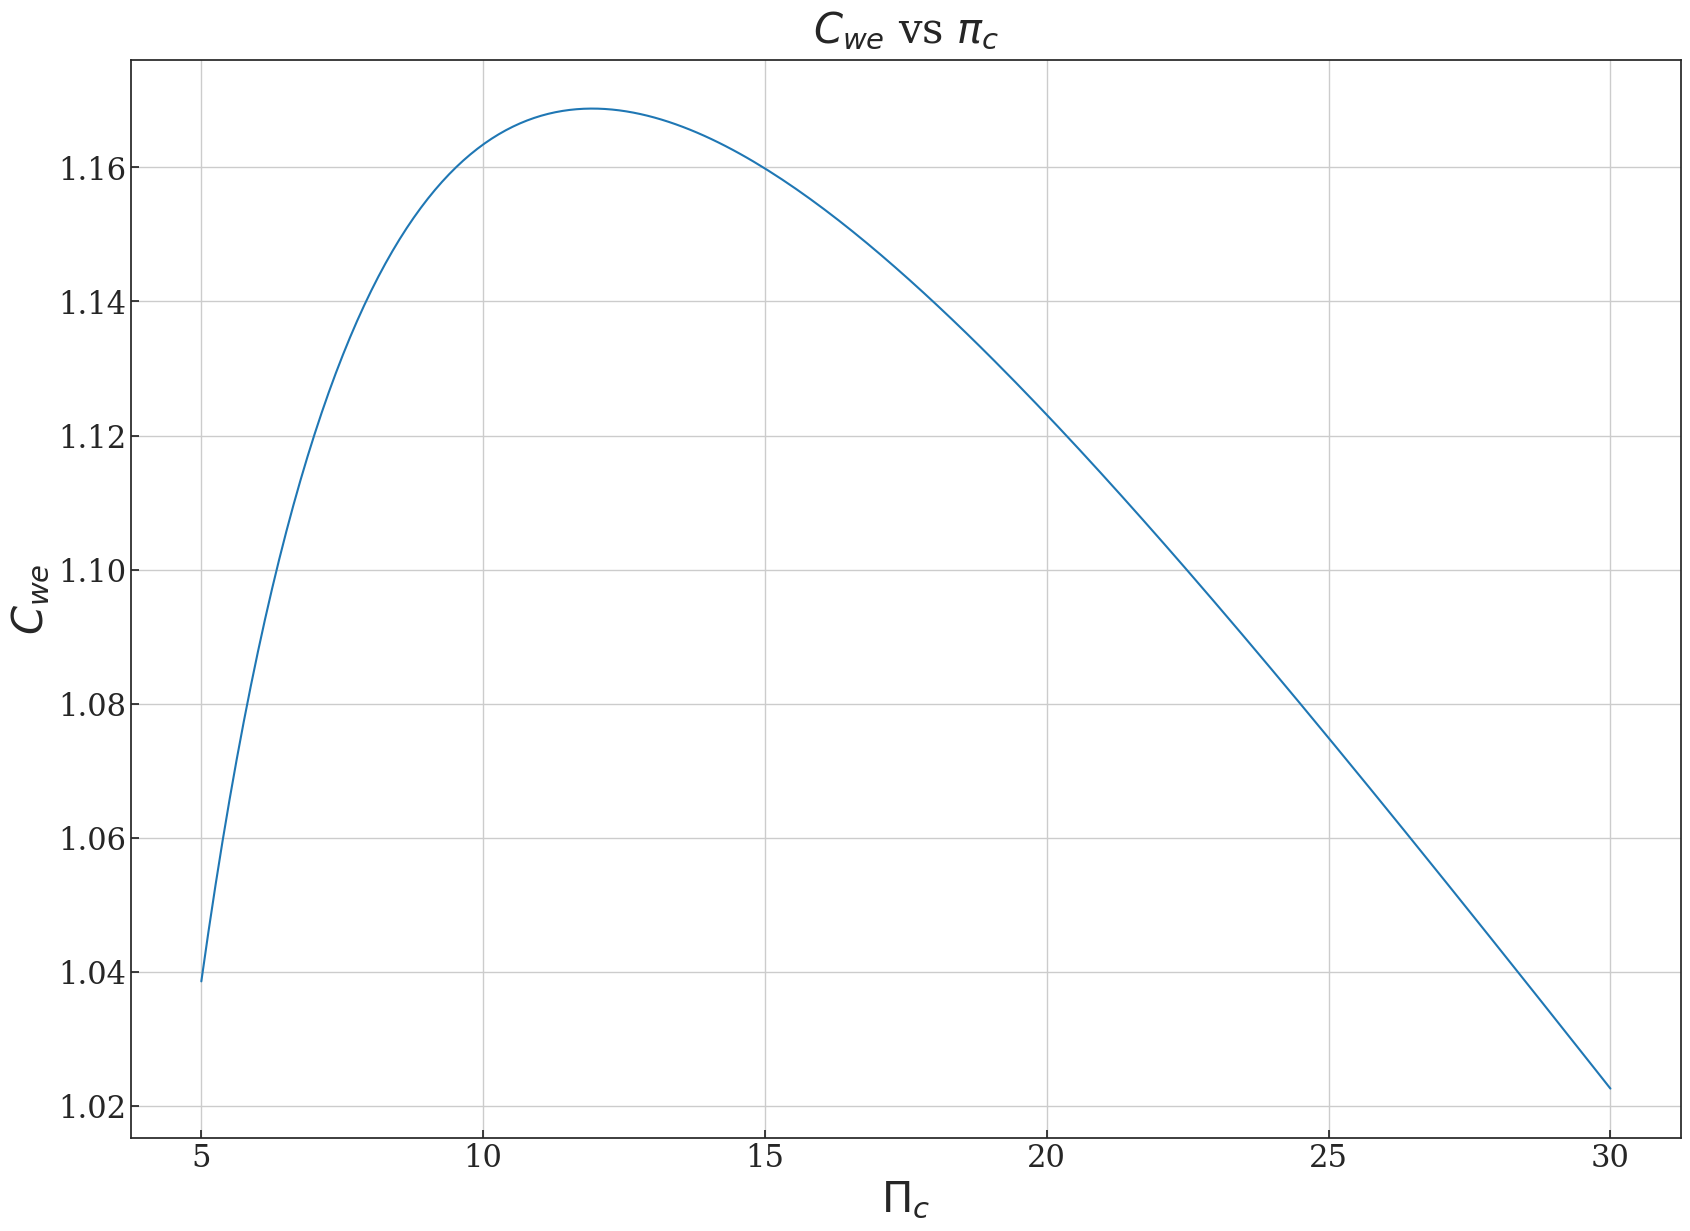

In [34]:
x = np.linspace(5,30,200)
Ft, Ndthrust, TSFC, Cwe = calcValues(piC=x)

plt.figure(figsize=(20,14))
plt.title(r"$C_{we}$ vs $\pi_c$")
plt.plot(x,Cwe)
plt.xlabel(r"$\Pi_c$")
plt.ylabel(r"$C_{we}$")
plt.show()

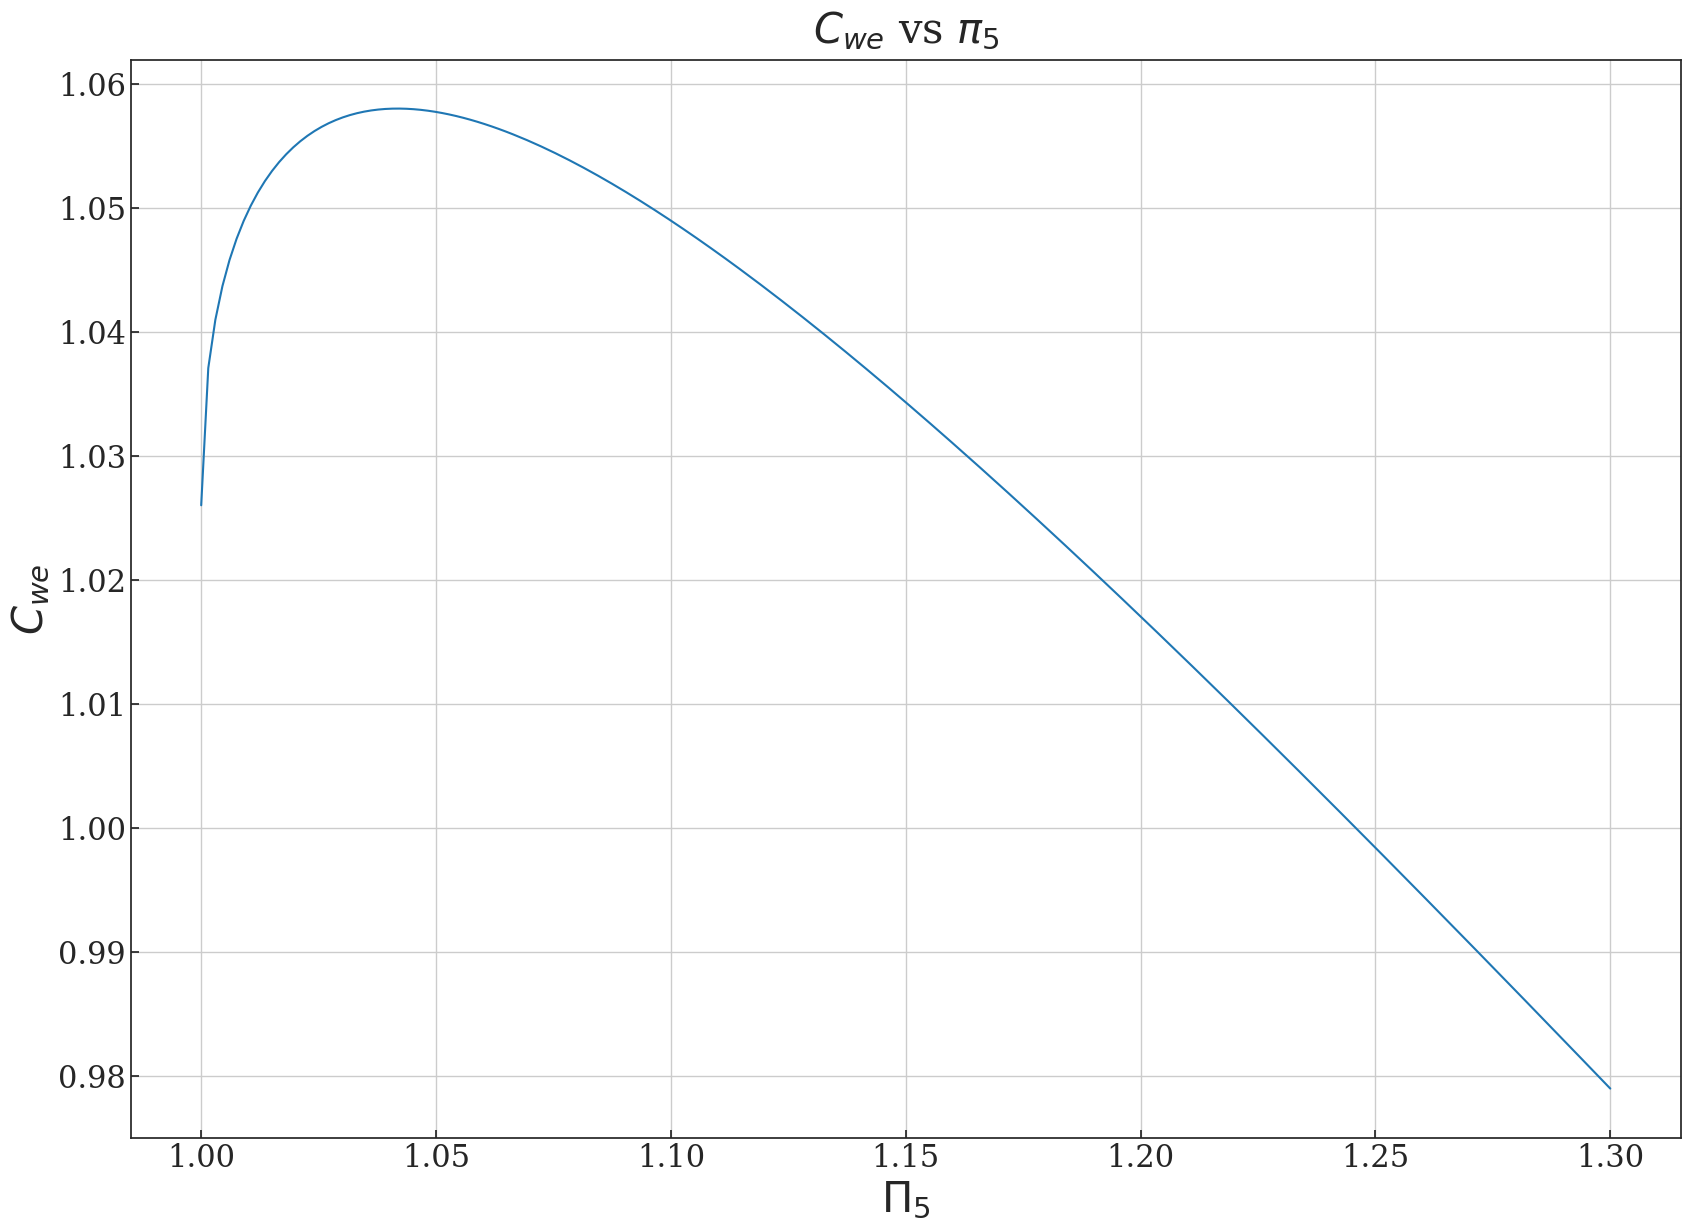

In [ ]:
x = np.linspace(1,1.3,200)
Ft, Ndthrust, TSFC, Cwe = calcValues(pi5=x)

plt.figure(figsize=(20,14))
plt.title(r"$C_{we}$ vs $\pi_5$")
plt.plot(x,Cwe)
plt.xlabel(r"$\Pi_5$")
plt.ylabel(r"$C_{we}$")
plt.show()
